### `Theia Compared to Other Detectors`
*This notebook compares Theia to detectors Super-Kamiokande and KamLAND, it includes the following two graphs*

Graph #1: Time evolution of **expected number of neutrino-interactions** 48 hours before collapse for a star of 15 solar masses located 150 pc away from earth.

Graph #2: Time evolution of **significance** 48 hours before collapse for a star of 15 solarmasses located 150 pc away from earth


### Graph #1: Time evolution of expected number of neutrino-interactions

In [1]:
from astropy import units as u
import matplotlib.pyplot as plt
import numpy as np

from snewpy import snowglobes

SNOwGLoBES_path = '/Users/peterasljung/Desktop/snowglobes/' # to use custom SNOwGLoBES detector/channel/smearing files, set SNOwGLoBES directory
SNEWPY_models_base = "models/"   # directory containing SNEWPY models

In [2]:
# set distance in kpc
distance = 0.15

# set SNOwGLoBES detector to use
detector = "theia"
detector_S = "wc100kt30prct"
detector_K = "scint20kt"

# set SNEWPY model type and filename
modeltype = 'Odrzywolek_2010'
model = 's15_nuebar_data'

# set desired flavor transformation
transformation = 'AdiabaticMSW_NMO'

# Construct file system path of model file and name of output file
# The output file will be stored in the same directory as the model file.
modelfile = SNEWPY_models_base + "presn-models/" + modeltype + "/" + model + '.txt'
outfile = modeltype+"_"+model+"_"+transformation

In [3]:
#Define time window
window_tstart = - 36000
window_tend = 0
window_bins = 100
tstart = np.linspace(window_tstart, window_tend, window_bins, endpoint=False) * u.s
tend = tstart + (window_tend - window_tstart) / window_bins * u.s
tmid = (tstart + tend) * 0.5

In [4]:
print("Preparing fluences ...")
tarredfile = snowglobes.generate_fluence(modelfile, modeltype, transformation, distance, outfile, tstart, tend)

Preparing fluences ...


In [5]:
#Super K

print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile, detector_input=detector_S)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables_S = snowglobes.collate(SNOwGLoBES_path, tarredfile, skip_plots=True)

Running SNOwGLoBES ...
Collating results ...


In [6]:
#Theia

print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile, detector_input=detector)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables = snowglobes.collate(SNOwGLoBES_path, tarredfile, skip_plots=True)

Running SNOwGLoBES ...


/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:155: UserWarning: Smearing not found for detector=theia, channel=ibd. Using unsmeared spectrum
  warn(f'Smearing not found for detector={detector}, channel={channel.name}. Using unsmeared spectrum')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=theia, channel=ibd. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')


Collating results ...


In [7]:
#KamLAND

print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile, detector_input=detector_K)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables_K = snowglobes.collate(SNOwGLoBES_path, tarredfile, skip_plots=True)

Running SNOwGLoBES ...


/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=ibd. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=nue_e. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=nuebar_e. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:16

Collating results ...


In [8]:
#Find keys
print(list(tables.keys()))

['theia', 'Collated_Odrzywolek_2010_s15_nuebar_data_AdiabaticMSW_NMO_0_theia_events_smeared_weighted.dat', 'Collated_Odrzywolek_2010_s15_nuebar_data_AdiabaticMSW_NMO_0_theia_events_unsmeared_weighted.dat', 'Collated_Odrzywolek_2010_s15_nuebar_data_AdiabaticMSW_NMO_1_theia_events_smeared_weighted.dat', 'Collated_Odrzywolek_2010_s15_nuebar_data_AdiabaticMSW_NMO_1_theia_events_unsmeared_weighted.dat', 'Collated_Odrzywolek_2010_s15_nuebar_data_AdiabaticMSW_NMO_2_theia_events_smeared_weighted.dat', 'Collated_Odrzywolek_2010_s15_nuebar_data_AdiabaticMSW_NMO_2_theia_events_unsmeared_weighted.dat', 'Collated_Odrzywolek_2010_s15_nuebar_data_AdiabaticMSW_NMO_3_theia_events_smeared_weighted.dat', 'Collated_Odrzywolek_2010_s15_nuebar_data_AdiabaticMSW_NMO_3_theia_events_unsmeared_weighted.dat', 'Collated_Odrzywolek_2010_s15_nuebar_data_AdiabaticMSW_NMO_4_theia_events_smeared_weighted.dat', 'Collated_Odrzywolek_2010_s15_nuebar_data_AdiabaticMSW_NMO_4_theia_events_unsmeared_weighted.dat', 'Collated_

In [9]:
key_S = 'Collated_Odrzywolek_2010_s15_nuebar_data_AdiabaticMSW_NMO_99_wc100kt30prct_events_unsmeared_weighted.dat'
print(f"Energy bins (in MeV):\n{tables_S[key_S]['data'][0][:12]}")
#print(f"{tables_S[key_S]['data'][0]}")

for i, channel in enumerate(tables_S[key_S]['header'].split()[1:]):

    print(f"Number of {channel} events in those energy bins:\n{tables_S[key_S]['data'][i+1][:12]}")

Energy bins (in MeV):
[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]
Number of ibd events in those energy bins:
[  0.           0.           0.          36.33988936  87.18921666
 105.08794206  93.64390998  69.82920697  46.68366232  28.57753867
  16.44297585   9.08872803]
Number of nue_O16 events in those energy bins:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Number of nuebar_O16 events in those energy bins:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Number of nc events in those energy bins:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Number of e events in those energy bins:
[ 11.48090472  64.6355114  115.30170385 124.22149088 101.83787037
  70.49544132  43.43429721  24.75700199  13.24378076   6.80454626
   3.36132804   1.62545381]


[  9.40813766   9.40813766  11.57024204  11.87738953  11.87738953
  11.87738953  11.87738953  11.87738953  11.87738953  11.87738953
  11.87738953  11.87738953  11.87738953  11.87738953  12.13731391
  15.34947766  15.34947766  15.34947766  15.34947766  15.34947766
  15.34947766  15.34947766  15.34947766  15.34947766  15.34947766
  15.76876619  19.9486206   19.9486206   19.9486206   19.9486206
  19.9486206   19.9486206   19.9486206   19.9486206   19.9486206
  21.90226943  24.63675272  24.63675272  24.63675272  24.63675272
  24.63675272  24.63675272  24.63675272  26.78573104  27.15312078
  28.14427775  28.15524545  28.15524545  28.15759363  28.64388482
  28.64388482  28.64388482  28.30164778  28.12416267  27.27846006
  26.7668808   26.26780404  25.87742598  25.92427256  25.9796917
  26.66249027  27.27154994  27.9015259   30.25404611  30.25404611
  34.5045198   35.13372762  35.13372762  41.44839474  43.61611629
  43.61611629  46.43692243  53.92670834  54.49395625  61.88560172
  66.7878506 

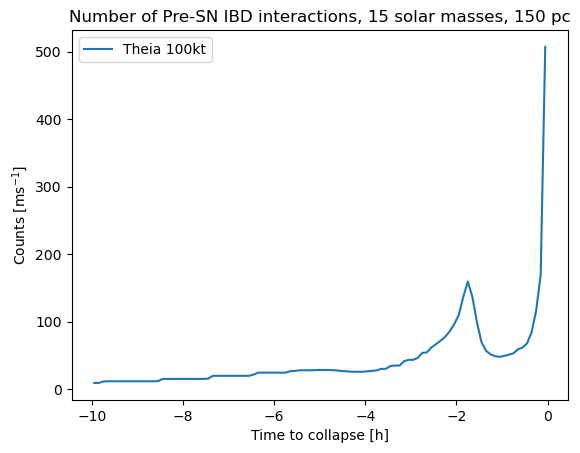

Total IBD Events in Theia: 4310.881111317869
Total IBD Events in Super K: 961.6903509037469
Total IBD Events in KamLAND: 54.975718029461106


In [12]:
%matplotlib inline
nevents = np.zeros(len(tmid))
nevents_S = np.zeros(len(tmid))
nevents_K = np.zeros(len(tmid))

#Super K
for i in range(len(tmid)):
    key_S = f"Collated_{outfile}_{i}_{detector_S}_events_unsmeared_weighted.dat"
    for idx, channel in enumerate(tables_S[key_S]['header'].split()[1:]):
        if channel == 'ibd':
            for j in range(1,len(tables_S[key_S]['header'].split())):
                nevents_S[i] += sum(tables_S[key_S]['data'][j])
                break

#Theia    
for i in range(len(tmid)):
    key = f"Collated_{outfile}_{i}_{detector}_events_unsmeared_weighted.dat"
    for j in range(1,len(tables[key]['header'].split())):
        #print(f"{tables[key]['data'][0]}")
        nevents[i] += sum(tables[key]['data'][j])

#KamLAND
for i in range(len(tmid)):
    key_K = f"Collated_{outfile}_{i}_{detector_K}_events_unsmeared_weighted.dat"
    for idx, channel in enumerate(tables_K[key_K]['header'].split()[1:]):
        if channel == 'ibd':
            for j in range(1,len(tables_K[key_K]['header'].split())):
                nevents_K[i] += sum(tables_K[key_K]['data'][j])
                break

tmid_h = tmid.to(u.hour)

plt.title('Number of Pre-SN IBD interactions, 15 solar masses, 150 pc')
plt.plot(tmid_h, nevents, label = 'Theia 100kt')
#plt.plot(tmid_h, nevents_S * 0.225, label = 'Super K 22.5 kt')
#plt.plot(tmid_h, nevents_K / 20, label = 'KamLAND 1kt')
#plt.yscale("log")
plt.legend()
plt.xlabel("Time to collapse [h]")
plt.ylabel("Counts [ms$^{-1}$]")
plt.show()

print("Total IBD Events in Theia:", sum(nevents))
print("Total IBD Events in Super K:", sum(nevents_S) * 0.225)
print("Total IBD Events in KamLAND:", sum((nevents_K)/20))

### Graph #2: Time evolution of significance compared to KamLAND and Super-K

In [ ]:
import math
significance_t = []
significance_s = []
significance_k = []

b_t = 4.072553
b_s =2.4
b_k = 0.142
s = 0

#Find significance
for k in nevents:
    s += k * 0.12
    sig = math.sqrt(2 * (((s + b_t) * math.log(1+(s/b_t)))-s))
    significance_t.append(sig)
s=0
for k in nevents_S:
    s += (k * 0.225*0.74)
    sig = math.sqrt(2 * (((s + b_s) * math.log(1+(s/b_s)))-s))
    significance_s.append(sig)
s=0
for k in nevents_K:
    s += ((k/28) *0.64)
    sig = math.sqrt(2 * (((s + b_k) * math.log(1+(s/b_k)))-s))
    significance_s.append(sig)
s=0

In [ ]:
#Plotting
y = [3] * len(significance_t) #For plotting the significance y=3 line

plt.plot(tmid_h, significance_t, label = 'Theia 100kt')
plt.plot(tmid_h, significance_s, label = 'Super K 22.5 kt')
plt.plot(tmid_h, significance_k, label = 'KamLAND 1kt')
plt.plot(tmid_h, y, color = 'gray', linestyle = 'dotted'label = '3 sigma significance')
plt.legend()
plt.title('Evolution of significance in various detectors')
plt.xlabel('Time until collapse [h]')
plt.ylabel('Significance [σ]')